# Optimized and cleaned version without changing functionality


# ---------------------------- Imports ----------------------------


In [1]:
import os
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences


# NLP libraries

In [2]:
import spacy
import en_core_web_sm
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# KaggleHub Data Download

In [3]:
import kagglehub
kagglehub.dataset_download('aggarwalrahul/nlp-specialization-data')

100%|██████████| 1.90G/1.90G [00:21<00:00, 94.5MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/aggarwalrahul/nlp-specialization-data/versions/10'

# ---------------------------- File Read ----------------------------

In [7]:
filepath = '/kaggle/input/nlp-specialization-data/Novel - Moby-Dick By Herman Melville.txt'

def read_file(filepath, limit=None):
    with open(filepath, encoding='utf-8') as f:
        text = f.read()
    return text if not limit else text[:limit]
nlp = en_core_web_sm.load()
nlp.max_length = 1198622

def tokenise(text):
    punct = '\"\n\t!\-#$%&()*+,./:;<=>?@[\\]^_`{|}~'
    return [token.text.lower() for token in nlp(text) if token.text not in punct]

raw_text = read_file(filepath, limit=250000)
tokens = tokenise(raw_text)
print(f"Token sample: {tokens[100:200]}")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/nlp-specialization-data/Novel - Moby-Dick By Herman Melville.txt'

# ---------------------------- Tokenization ----------------------------

In [10]:
filepath='/root/.cache/kagglehub/datasets/aggarwalrahul/nlp-specialization-data/versions/10/aggarwalrahul/nlp-specialization-data'

def tokenise(text):
    punct = '\"\n\t!\-#$%&()*+,./:;<=>?@[\\]^_`{|}~'
    return [token.text.lower() for token in nlp(text) if token.text not in punct]

raw_text = read_file(filepath, limit=250000)
tokens = tokenise(raw_text)
print(f"Token sample: {tokens[100:200]}")

FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/aggarwalrahul/nlp-specialization-data/versions/10/aggarwalrahul/nlp-specialization-data'

In [11]:
import os

# Base directory where KaggleHub extracted the dataset
base_path = "/root/.cache/kagglehub/datasets/aggarwalrahul/nlp-specialization-data/versions/10"

# Recursively walk through all directories to find files
for dirpath, dirnames, filenames in os.walk(base_path):
    for file in filenames:
        print(os.path.join(dirpath, file))


/root/.cache/kagglehub/datasets/aggarwalrahul/nlp-specialization-data/versions/10/India_text_summ.txt
/root/.cache/kagglehub/datasets/aggarwalrahul/nlp-specialization-data/versions/10/singleEnglishWord.wav
/root/.cache/kagglehub/datasets/aggarwalrahul/nlp-specialization-data/versions/10/testSpeech.wav
/root/.cache/kagglehub/datasets/aggarwalrahul/nlp-specialization-data/versions/10/unlabeledTrainData.tsv
/root/.cache/kagglehub/datasets/aggarwalrahul/nlp-specialization-data/versions/10/Cleaned_POS_Medical_Notes.csv
/root/.cache/kagglehub/datasets/aggarwalrahul/nlp-specialization-data/versions/10/Novel - Moby-Dick By Herman Melville.txt
/root/.cache/kagglehub/datasets/aggarwalrahul/nlp-specialization-data/versions/10/harvard.wav
/root/.cache/kagglehub/datasets/aggarwalrahul/nlp-specialization-data/versions/10/Labels_Medical_Notes.csv
/root/.cache/kagglehub/datasets/aggarwalrahul/nlp-specialization-data/versions/10/Stock_Price_Prediction_AAPL_data.csv
/root/.cache/kagglehub/datasets/aggar

In [12]:
filepath="/root/.cache/kagglehub/datasets/aggarwalrahul/nlp-specialization-data/versions/10/Novel - Moby-Dick By Herman Melville.txt"

In [13]:
raw_text = read_file(filepath, limit=250000)
tokens = tokenise(raw_text)
print(f"Token sample: {tokens[100:200]}")


Token sample: ['rear', 'of', 'every', 'funeral', 'i', 'meet', 'and', 'especially', 'whenever', 'my', 'hypos', 'get', 'such', 'an', 'upper', 'hand', 'of', 'me', 'that', 'it', 'requires', 'a', 'strong', 'moral', 'principle', 'to', 'prevent', 'me', 'from', 'deliberately', 'stepping', 'into', 'the', 'street', 'and', 'methodically', 'knocking', 'people', "'s", 'hats', 'off', '--', 'then', 'i', 'account', 'it', 'high', 'time', 'to', 'get', 'to', 'sea', 'as', 'soon', 'as', 'i', 'can', ' ', 'this', 'is', 'my', 'substitute', 'for', 'pistol', 'and', 'ball', ' ', 'with', 'a', 'philosophical', 'flourish', 'cato', 'throws', 'himself', 'upon', 'his', 'sword', 'i', 'quietly', 'take', 'to', 'the', 'ship', ' ', 'there', 'is', 'nothing', 'surprising', 'in', 'this', ' ', 'if', 'they', 'but', 'knew', 'it', 'almost', 'all', 'men', 'in']


In [14]:
def tokenise(text):
    punct = '\"\n\t!\-#$%&()*+,./:;<=>?@[\\]^_`{|}~'
    return [token.text.lower() for token in nlp(text) if token.text not in punct]

raw_text = read_file(filepath, limit=250000)
tokens = tokenise(raw_text)
print(f"Token sample: {tokens[100:200]}")

Token sample: ['rear', 'of', 'every', 'funeral', 'i', 'meet', 'and', 'especially', 'whenever', 'my', 'hypos', 'get', 'such', 'an', 'upper', 'hand', 'of', 'me', 'that', 'it', 'requires', 'a', 'strong', 'moral', 'principle', 'to', 'prevent', 'me', 'from', 'deliberately', 'stepping', 'into', 'the', 'street', 'and', 'methodically', 'knocking', 'people', "'s", 'hats', 'off', '--', 'then', 'i', 'account', 'it', 'high', 'time', 'to', 'get', 'to', 'sea', 'as', 'soon', 'as', 'i', 'can', ' ', 'this', 'is', 'my', 'substitute', 'for', 'pistol', 'and', 'ball', ' ', 'with', 'a', 'philosophical', 'flourish', 'cato', 'throws', 'himself', 'upon', 'his', 'sword', 'i', 'quietly', 'take', 'to', 'the', 'ship', ' ', 'there', 'is', 'nothing', 'surprising', 'in', 'this', ' ', 'if', 'they', 'but', 'knew', 'it', 'almost', 'all', 'men', 'in']


# ---------------------------- EDA ----------------------------

In [15]:
nltk.download("stopwords")
nltk.download("punkt")

text = read_file(filepath)
words = [word.lower() for word in word_tokenize(text) if word.isalpha()]
stop_words = set(stopwords.words("english"))
words = [word for word in words if word not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [16]:
import nltk

# Force delete and re-download 'punkt'
nltk.download('punkt', download_dir='/root/nltk_data', force=True)
nltk.download('stopwords', download_dir='/root/nltk_data', force=True)

# Manually set the nltk path
nltk.data.path.append("/root/nltk_data")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

text = read_file(filepath)
words = [word.lower() for word in word_tokenize(text) if word.isalpha()]
stop_words = set(stopwords.words("english"))
words = [word for word in words if word not in stop_words]


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/root/nltk_data'
**********************************************************************


In [18]:
import spacy
import en_core_web_sm
from collections import Counter

# Load spaCy model
nlp = en_core_web_sm.load()
nlp.max_length = 1200000

# Read file
def read_file(filepath):
    with open(filepath, encoding='utf-8') as f:
        return f.read()

text = read_file(filepath)

# Process text with spaCy
doc = nlp(text[:250000])  # You can limit for speed

# Filter tokens
words = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]

# Basic stats
total_words = len(words)
unique_words = len(set(words))
average_word_length = sum(len(word) for word in words) / total_words

# Sentence and paragraph counts (using spaCy)
total_sentences = len(list(doc.sents))
total_paragraphs = text.count('\n\n')

# Output
print(f"Total Words: {total_words}")
print(f"Unique Words: {unique_words}")
print(f"Average Word Length: {average_word_length:.2f}")
print(f"Total Sentences: {total_sentences}")
print(f"Total Paragraphs: {total_paragraphs}")

# Word frequencies
freq_dist = Counter(words)


Total Words: 19131
Unique Words: 6518
Average Word Length: 6.02
Total Sentences: 1852
Total Paragraphs: 2832


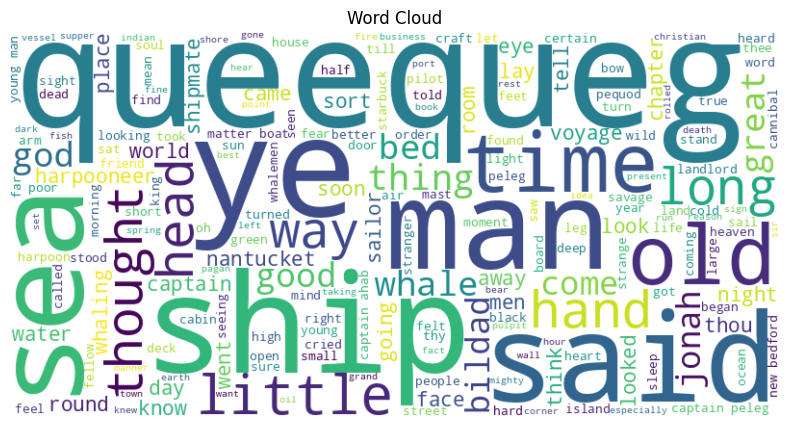

In [19]:
# Word Cloud
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(words))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud")
plt.show()


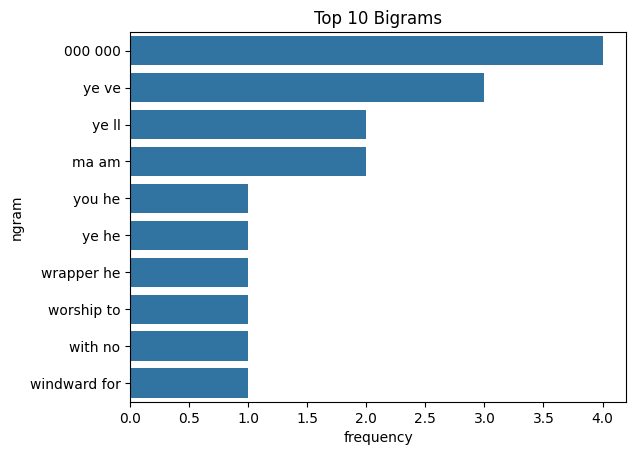

In [20]:

# Bigram frequency plot
cv = CountVectorizer(ngram_range=(2, 2))
bigrams = cv.fit_transform(tokens)
bigram_freq = pd.DataFrame(sorted(zip(bigrams.toarray().sum(axis=0), cv.get_feature_names_out()), reverse=True), columns=["frequency", "ngram"])
sns.barplot(x=bigram_freq["frequency"][:10], y=bigram_freq["ngram"][:10])
plt.title("Top 10 Bigrams")
plt.show()

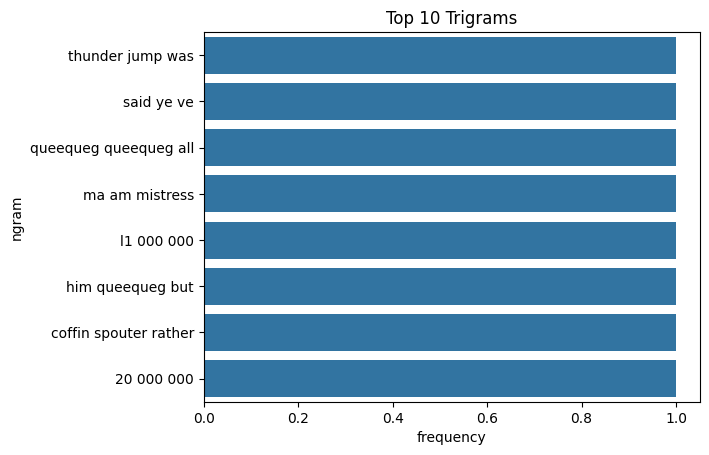

In [21]:

# Trigram frequency plot
cv3 = CountVectorizer(ngram_range=(3, 3))
trigrams = cv3.fit_transform(tokens)
trigram_freq = pd.DataFrame(sorted(zip(trigrams.toarray().sum(axis=0), cv3.get_feature_names_out()), reverse=True), columns=["frequency", "ngram"])
sns.barplot(x=trigram_freq["frequency"][:10], y=trigram_freq["ngram"][:10])
plt.title("Top 10 Trigrams")
plt.show()

In [22]:
# ---------------------------- Text Preprocessing ----------------------------
tokenizer = Tokenizer()
tokenizer.fit_on_texts([tokens])
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([tokens])[0]
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {vocab_size}")

train_len = 50
sequences = [sequence_data[i-train_len:i+1] for i in range(train_len, len(sequence_data))]
sequences = pad_sequences(sequences, maxlen=train_len+1, padding='pre')

x, labels = sequences[:,:-1], sequences[:,-1]
y = to_categorical(labels, num_classes=vocab_size)

Vocabulary Size: 7005


In [23]:
# ---------------------------- Model ----------------------------
model = Sequential([
    Embedding(vocab_size, 100, input_length=train_len),
    Bidirectional(LSTM(150)),
    Dense(vocab_size, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])
history = model.fit(x, y, epochs=50, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 366s 242ms/step - accuracy: 0.0559 - loss: 7.0407
Epoch 2/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 368s 234ms/step - accuracy: 0.1050 - loss: 5.8205
Epoch 3/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 384s 235ms/step - accuracy: 0.1494 - loss: 4.8968
Epoch 4/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 374s 229ms/step - accuracy: 0.2431 - loss: 3.8342
Epoch 5/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 357s 242ms/step - accuracy: 0.3563 - loss: 2.9937
Epoch 6/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 362s 228ms/step - accuracy: 0.4467 - loss: 2.4422
Epoch 7/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 377s 225ms/step - accuracy: 0.4964 - loss: 2.1370
Epoch 8/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 385s 227ms/step - accuracy: 0.5382 - loss: 1.9236
Epoch 9/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 379s 225ms/step - accuracy: 0.5613 - loss: 1.7928
Epoch 10/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 393s 233ms/step - accuracy: 0.5816 - loss: 1.6981
Epoch 11/50
1477/1477 ━━━━━━━━━━━━━━━━━━━━ 331s 224ms/step - accuracy: 0.5950 -

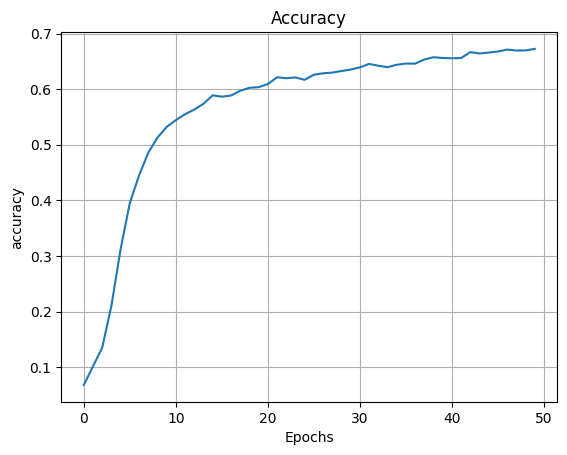

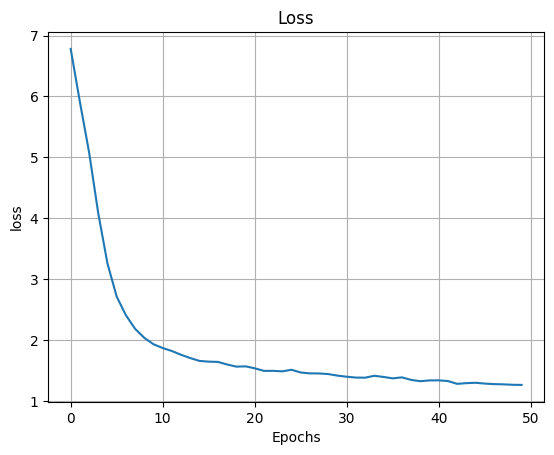

In [24]:
# ---------------------------- Evaluation ----------------------------
def plot_metric(history, metric):
    plt.plot(history.history[metric])
    plt.title(metric.capitalize())
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.grid(True)
    plt.show()

plot_metric(history, 'accuracy')
plot_metric(history, 'loss')

In [25]:
# ---------------------------- Prediction ----------------------------
def generate_text(seed_text, next_words, tokenizer, model, max_seq_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                seed_text += " " + word
                break
    return seed_text

print(generate_text("Let the most absent-minded", 20, tokenizer, model, max_sequence_len=train_len+1))
print(generate_text("Some years ago i had little or no", 11, tokenizer, model, max_sequence_len=train_len+1))

TypeError: generate_text() got an unexpected keyword argument 'max_sequence_len'

In [ ]:
# prompt: # ---------------------------- Prediction ----------------------------
# def generate_text(seed_text, next_words, tokenizer, model, max_seq_len):
#     for _ in range(next_words):
#         token_list = tokenizer.texts_to_sequences([seed_text])[0]
#         token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
#         predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
#         for word, index in tokenizer.word_index.items():
#             if index == predicted:
#                 seed_text += " " + word
#                 break
#     return seed_text
# print(generate_text("Let the most absent-minded", 20, tokenizer, model, max_sequence_len=train_len+1))
# print(generate_text("Some years ago i had little or no", 11, tokenizer, model, max_sequence_len=train_len+1))
# -------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# <ipython-input-25-6e2eb5f31fc7> in <cell line: 0>()
#      11     return seed_text
#      12
# ---> 13 print(generate_text("Let the most absent-minded", 20, tokenizer, model, max_sequence_len=train_len+1))
#      14 print(generate_text("Some years ago i had little or no", 11, tokenizer, model, max_sequence_len=train_len+1))
# TypeError: generate_text() got an unexpected keyword argument 'max_sequence_len'

import numpy as np
# ---------------------------- Prediction ----------------------------
def generate_text(seed_text, next_words, tokenizer, model, max_seq_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        # Use the correct parameter name 'maxlen'
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                seed_text += " " + word
                break
    return seed_text

# Call the function with the correct parameter name 'max_seq_len'
print(generate_text("Let the most absent-minded", 20, tokenizer, model, max_seq_len=train_len+1))
print(generate_text("Some years ago i had little or no", 11, tokenizer, model, max_seq_len=train_len+1))


In [26]:
# prompt: # ---------------------------- Prediction ----------------------------
# def generate_text(seed_text, next_words, tokenizer, model, max_seq_len):
#     for _ in range(next_words):
#         token_list = tokenizer.texts_to_sequences([seed_text])[0]
#         token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
#         predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
#         for word, index in tokenizer.word_index.items():
#             if index == predicted:
#                 seed_text += " " + word
#                 break
#     return seed_text
# print(generate_text("Let the most absent-minded", 20, tokenizer, model, max_sequence_len=train_len+1))
# print(generate_text("Some years ago i had little or no", 11, tokenizer, model, max_sequence_len=train_len+1))
# -------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# <ipython-input-25-6e2eb5f31fc7> in <cell line: 0>()
#      11     return seed_text
#      12
# ---> 13 print(generate_text("Let the most absent-minded", 20, tokenizer, model, max_sequence_len=train_len+1))
#      14 print(generate_text("Some years ago i had little or no", 11, tokenizer, model, max_sequence_len=train_len+1))
# TypeError: generate_text() got an unexpected keyword argument 'max_sequence_len'

import numpy as np
# ---------------------------- Prediction ----------------------------
def generate_text(seed_text, next_words, tokenizer, model, max_seq_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        # Use the correct parameter name 'maxlen'
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                seed_text += " " + word
                break
    return seed_text

# Call the function with the correct parameter name 'max_seq_len'
print(generate_text("Let the most absent-minded", 20, tokenizer, model, max_seq_len=train_len+1))
print(generate_text("Some years ago i had little or no", 11, tokenizer, model, max_seq_len=train_len+1))


Let the most absent-minded of casks on casks were piled for ottomans and centre table borne awful visible for ottomans and parade twelve o'clock
Some years ago i had little or no act to distant woodlands winds rushing waters taking over the table


In [27]:
model.save("next_model.h5")

In [29]:
model.save('my_model.keras')